In [ ]:
from scipy.io import loadmat
data = loadmat('/Users/youssefbenmansour/Downloads/Xtrain.mat')['Xtrain']

In [2]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout
import numpy as np
import matplotlib.pyplot as plt

In [3]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [4]:
def create_dataset(data, time_step=100):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

X, y = create_dataset(scaled_data)
X = X.reshape(X.shape[0], X.shape[1], 1)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

In [6]:
model = Sequential()
model.add(SimpleRNN(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(SimpleRNN(units=100, return_sequences=False))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
model.fit(X_train, y_train, epochs=100, batch_size=32)

predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.1873
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0108
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0089
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0077
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0087
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0082
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0072
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0060
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0064
Epoch 10/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0063
Epoch 11/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0060
Epoch 12/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0057
Epoch 13/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0060
Epoch 14/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0048
Epoch 15/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - lo

In [8]:
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

Mean Squared Error (MSE): 6387.107487818629
Root Mean Squared Error (RMSE): 79.9193811776507
Mean Absolute Error (MAE): 64.41520945798443


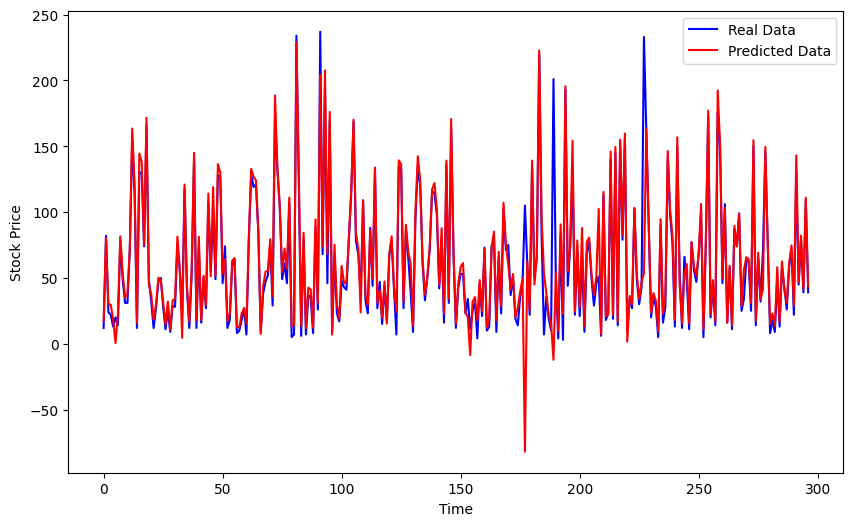

In [9]:
plt.figure(figsize=(10,6))
plt.plot(scaler.inverse_transform(y_test.reshape(-1, 1)), color='blue', label='Real Data')
plt.plot(predictions, color='red', label='Predicted Data')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model2 = Sequential()
model2.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model2.add(LSTM(units=50, return_sequences=False))
model2.add(Dense(units=1))
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='loss', patience=5)

model2.compile(optimizer='adam', loss='mean_squared_error')
model2.fit(X_train, y_train, epochs=100, batch_size=32, callbacks=[early_stop])


Epoch 1/100


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0478
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0343
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0338
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0320
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0314
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0292
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0261
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0203
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0151
Epoch 10/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0163
Epoch 11/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0148
Epoch 12/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0131
Epoch 13/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0138
Epoch 14/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0119
Epoch 15/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0101
E

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Mean Squared Error (MSE): 6030.70646645179
Root Mean Squared Error (RMSE): 77.65762336340065
Mean Absolute Error (MAE): 61.266432085400346


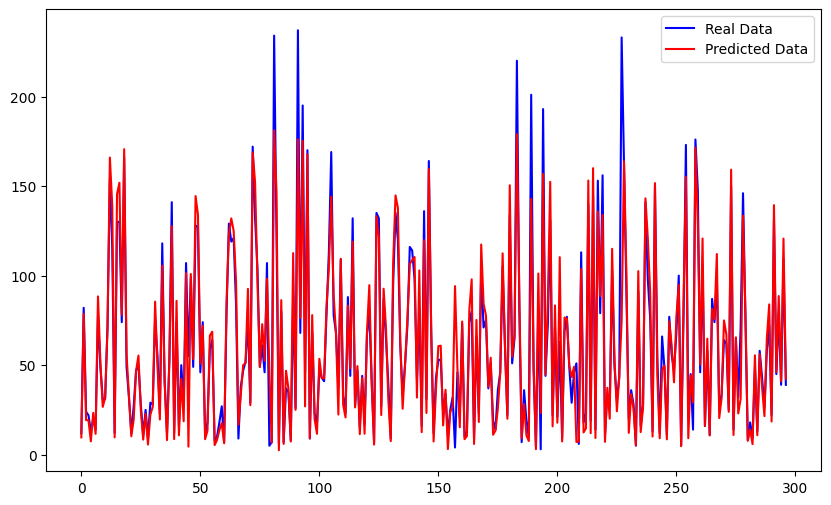

In [11]:
predictions = model2.predict(X_test)
predictions = scaler.inverse_transform(predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
plt.figure(figsize=(10,6))
plt.plot(scaler.inverse_transform(y_test.reshape(-1, 1)), color='blue', label='Real Data')
plt.plot(predictions, color='red', label='Predicted Data')
plt.legend()
plt.show()

# GRU

Epoch 1/10
 3/19 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 4.4960e-04

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.8230e-04
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 8.6321e-04
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.5964e-04
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 5.9981e-04
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 8.9722e-04
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 5.9542e-04
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 6.5318e-04
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 5.1245e-04
Epoch 9/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 4.3243e-04
Epoch 10/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 2.9720e-04
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Mean Squared Error (MSE): 5675.991309255156
Root Mean Squared Error (RMSE): 75.33917512990938
Mean Absolute Error (MAE): 57.17732793514175


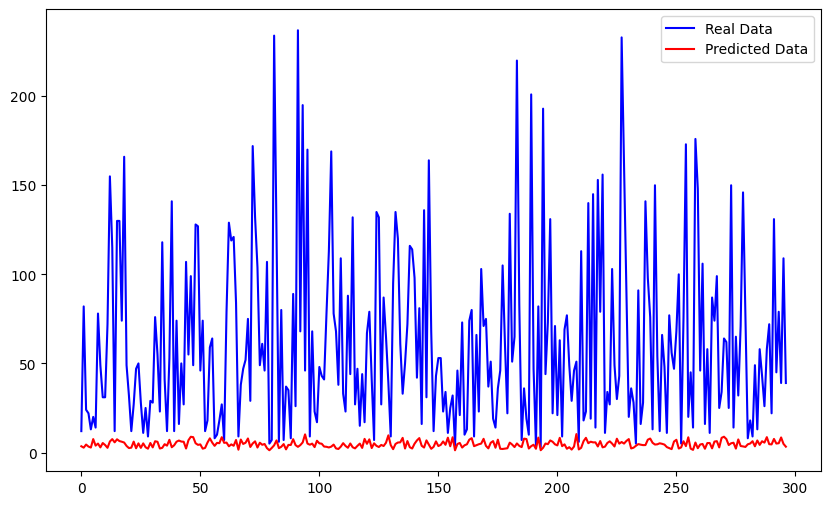

In [13]:
from tensorflow.keras.layers import GRU
from tensorflow.keras.optimizers import Adam

model_GRU = Sequential()
model_GRU.add(GRU(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model_GRU.add(GRU(units=50))
model_GRU.add(Dense(units=1)) 
model_GRU.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=10, batch_size=32)
predictions = model_GRU.predict(X_test)
predictions = scaler.inverse_transform(predictions)
mse = mean_squared_error(scaler.inverse_transform(y_test.reshape(-1, 1)), predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(scaler.inverse_transform(y_test.reshape(-1, 1)), predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

plt.figure(figsize=(10,6))
plt.plot(scaler.inverse_transform(y_test.reshape(-1, 1)), color='blue', label='Real Data')
plt.plot(predictions, color='red', label='Predicted Data')
plt.legend()
plt.show()

In [ ]:
time_steps=list(range(25, 151, 25))
results=[]
print("sequential")
for ts in time_steps:
  X, y = create_dataset(scaled_data, ts)
  X = X.reshape(X.shape[0], X.shape[1], 1) #3D reshaping

  train_size = int(len(X) * 0.7)
  X_train, X_test = X[:train_size], X[train_size:]
  y_train, y_test = y[:train_size], y[train_size:]  

  model = Sequential()
  model.add(SimpleRNN(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1))) # First RNN layer, returns sequences for the next layer 
  model.add(SimpleRNN(units=100, return_sequences=False)) # Second RNN layer, outputs a single value (not sequence)
  model.add(Dense(units=1)) #output layer
  model.compile(optimizer='adam', loss='mean_squared_error')
  
  model.fit(X_train, y_train, epochs=100, batch_size=32)
  predictions = model.predict(X_test)
  predictions = scaler.inverse_transform(predictions)

  mse = mean_squared_error(y_test, predictions)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(y_test, predictions)
  results.append([ts, mse, rmse, mae])

for result in results:
  print(f"Time Step: {result[0]}, MSE: {result[1]}, RMSE: {result[2]}, MAE: {result[3]}")

results.clear()
print("LSTM")
for ts in time_steps:
  X, y = create_dataset(scaled_data, ts)
  X = X.reshape(X.shape[0], X.shape[1], 1) #3D reshaping

  train_size = int(len(X) * 0.7)
  X_train, X_test = X[:train_size], X[train_size:]
  y_train, y_test = y[:train_size], y[train_size:]  

  model2 = Sequential()
  model2.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
  model2.add(LSTM(units=50, return_sequences=False))
  model2.add(Dense(units=1))
  
  early_stop = EarlyStopping(monitor='loss', patience=5)
  model2.compile(optimizer='adam', loss='mean_squared_error')
  model2.fit(X_train, y_train, epochs=100, batch_size=32, callbacks=[early_stop])

  predictions = model2.predict(X_test)
  predictions = scaler.inverse_transform(predictions)

  mse = mean_squared_error(y_test, predictions)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(y_test, predictions)
  results.append([ts, mse, rmse, mae])

for result in results:
  print(f"Time Step: {result[0]}, MSE: {result[1]}, RMSE: {result[2]}, MAE: {result[3]}")

sequential
Epoch 1/100


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1913 
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0160
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0121
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0108
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0089
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0084
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0064
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0068
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0082
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0076
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0065
Epoch 12/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0080
Epoch 13/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0076
Epoch 14/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0085
Epoch 15/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047
Epoch 16/100
22

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1380
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0127
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0124
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0087
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0104
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0101
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0099
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0104
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0097
Epoch 10/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0074
Epoch 11/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0095
Epoch 12/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0093
Epoch 13/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0063
Epoch 14/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0069
Epoch 15/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0063
E

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.1336
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0108
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0114
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0088
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0070
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0089
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0103
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0076
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0075
Epoch 10/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0083
Epoch 11/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0074
Epoch 12/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0073
Epoch 13/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0066
Epoch 14/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0059
Epoch 15/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0071
E

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.2484
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0194
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0134
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0090
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0088
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0087
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0105
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0076
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0063
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0049
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0053
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0056
Epoch 13/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0052
Epoch 14/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0061
Epoch 15/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0047
E

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1288
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0134
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0090
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0118
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0212
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0119
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0098
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0075
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0104
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0075
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0102
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0080
Epoch 13/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0125
Epoch 14/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0071
Epoch 15/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0104
E

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.4699
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0310
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0139
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0092
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0092
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0095
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0076
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0078
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0086
Epoch 10/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0088
Epoch 11/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0091
Epoch 12/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0069
Epoch 13/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0122
Epoch 14/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0085
Epoch 15/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0070
E

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0590 
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0418
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0388
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0350
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0402
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0338
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0288
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0227
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0190
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0150
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0150
Epoch 12/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0150
Epoch 13/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0132
Epoch 14/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0134
Epoch 15/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0146
Epoch 16/100
22

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0723
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0378
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0401
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0368
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0338
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0307
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0278
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0150
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0169
Epoch 10/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0165
Epoch 11/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0154
Epoch 12/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0166
Epoch 13/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0159
Epoch 14/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0124
Epoch 15/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0113
E

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0465
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0384
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0350
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0377
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0346
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0320
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0300
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0169
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0173
Epoch 10/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0133
Epoch 11/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0142
Epoch 12/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0154
Epoch 13/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0160
Epoch 14/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0139
Epoch 15/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0136
E

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0609
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0391
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0371
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0332
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0352
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0288
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0278
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0192
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0162
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0186
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0131
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0126
Epoch 13/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0124
Epoch 14/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0125
Epoch 15/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0121
E

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0476
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0394
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0399
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0373
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0352
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0306
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0253
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0201
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0177
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0182
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0144
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0150
Epoch 13/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0161
Epoch 14/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0190
Epoch 15/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0125
E

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0526
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0348
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0366
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0352
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0319
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0317
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0289
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0193
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0190
Epoch 10/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0150
Epoch 11/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0125
Epoch 12/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0136
Epoch 13/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0153
Epoch 14/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0142
Epoch 15/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0129
E

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

# Define and compile the model
model_GRU = Sequential()
model_GRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_GRU.add(GRU(units=50))
model_GRU.add(Dense(units=1))
model_GRU.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
model_GRU.fit(X_train, y_train, epochs=10, batch_size=32)

# Make predictions
predictions = model_GRU.predict(X_test)

# Inverse transform to get original scale
predictions_inv = scaler.inverse_transform(predictions)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate error metrics
mse = mean_squared_error(y_test_inv, predictions_inv)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_inv, predictions_inv)

# Print the errors
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(y_test_inv, color='blue', label='Real Data')
plt.plot(predictions_inv, color='red', label='Predicted Data')
plt.title('GRU Model Predictions vs Real Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


In [ ]:
print(data)